In [168]:
import pandas as pd
import numpy as np


In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [178]:
from sklearn.preprocessing import StandardScaler

In [180]:
data_file_path = "C:/Users/hp/Downloads/osteoporosis.csv"
df = pd.read_csv(data_file_path)

In [182]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [186]:
df.isnull().sum()*100 /len(df)

Id                      0.000000
Age                     0.000000
Gender                  0.000000
Hormonal Changes        0.000000
Family History          0.000000
Race/Ethnicity          0.000000
Body Weight             0.000000
Calcium Intake          0.000000
Vitamin D Intake        0.000000
Physical Activity       0.000000
Smoking                 0.000000
Alcohol Consumption    50.459653
Medical Conditions     33.043922
Medications            50.306435
Prior Fractures         0.000000
Osteoporosis            0.000000
dtype: float64

In [188]:
df = df.rename(columns={
    "Hormonal Changes": "Hormonal_Changes",
    "Family History" : "Family_History",
    "Body Weight" : "Body_Weight",
    "Calcium Intake" : "Calcium_Intake",
    "Vitamin D Intake" : "Vitamin_D_Intake",
    "Physical Activity" : "Physical_Activity",
    "Alcohol Consumption" : "Alcohol_Consumption",
    "Medical Conditions" : "Medical_Conditions",
    "Prior Fractures" : "Prior_Fractures", 
})

In [190]:
# Assuming df is your DataFrame containing the data
# Loop through each column
for col in df.columns:
    # Check if the column has dtype object
    if df[col].dtype == 'object':
        # Initialize LabelEncoder
        le = LabelEncoder()
        # Fit and transform the column
        df[col] = le.fit_transform(df[col])

In [192]:
df.head()

,Id,Age,Gender,Hormonal_Changes,Family_History,Race/Ethnicity,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Smoking,Alcohol_Consumption,Medical_Conditions,Medications,Prior_Fractures,Osteoporosis
0,1734616,69,0,0,1,1,1,1,1,1,1,0,1,0,1,1
1,1419098,32,0,0,1,1,1,1,1,1,0,1,2,1,1,1
2,1797916,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,1805337,78,0,0,0,2,1,0,0,1,1,1,1,0,0,1
4,1351334,38,1,1,1,0,0,1,1,0,1,1,1,1,1,1


In [194]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized = df_normalized.drop(['Id','Alcohol_Consumption','Medications'], axis=1)

In [196]:
df_normalized.head()

,Age,Gender,Hormonal_Changes,Family_History,Race/Ethnicity,Body_Weight,Calcium_Intake,Vitamin_D_Intake,Physical_Activity,Smoking,Medical_Conditions,Prior_Fractures,Osteoporosis
0,0.708333,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
1,0.194444,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.986111,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.833333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.5,0.0,1.0
4,0.277778,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5,1.0,1.0


In [198]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1958 non-null   float64
 1   Gender              1958 non-null   float64
 2   Hormonal_Changes    1958 non-null   float64
 3   Family_History      1958 non-null   float64
 4   Race/Ethnicity      1958 non-null   float64
 5   Body_Weight         1958 non-null   float64
 6   Calcium_Intake      1958 non-null   float64
 7   Vitamin_D_Intake    1958 non-null   float64
 8   Physical_Activity   1958 non-null   float64
 9   Smoking             1958 non-null   float64
 10  Medical_Conditions  1958 non-null   float64
 11  Prior_Fractures     1958 non-null   float64
 12  Osteoporosis        1958 non-null   float64
dtypes: float64(13)
memory usage: 199.0 KB


-Logistic Regression Accuracy: 81.97%
Precision: 0.86
Recall: 0.78
F1-score: 0.82


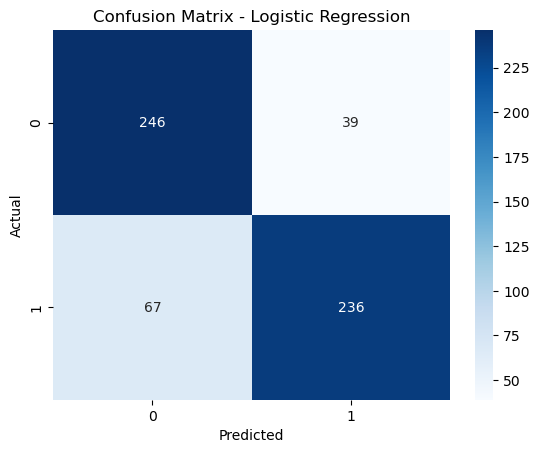

-Gradient Boosting Classifier Accuracy: 92.01%
Precision: 1.00
Recall: 0.85
F1-score: 0.92


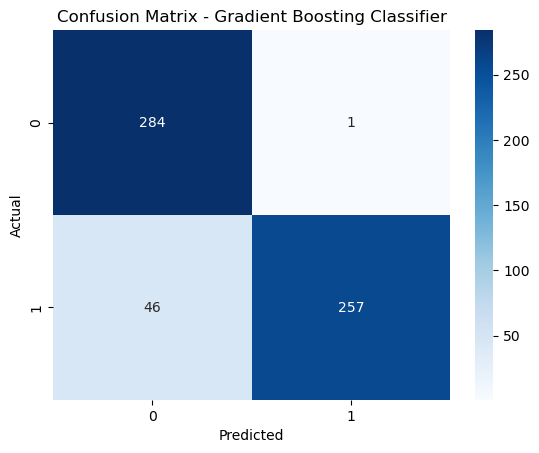

-K-Nearest Neighbors Accuracy: 69.05%
Precision: 0.73
Recall: 0.64
F1-score: 0.68


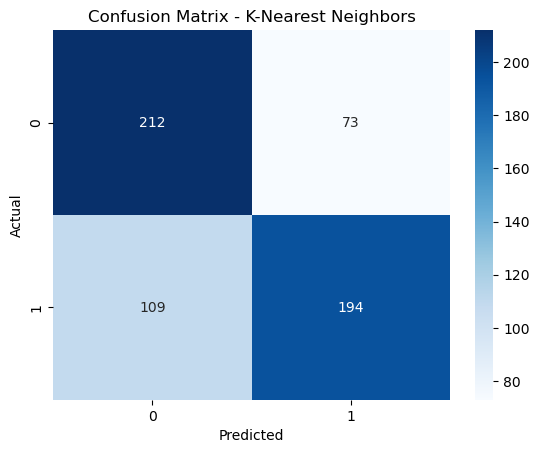

In [210]:
# Assuming df is your DataFrame and 'Osteoporosis' is your target column
X = df_normalized.drop(['Osteoporosis'], axis=1)
y = df_normalized['Osteoporosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define the models
models = {
     "Logistic Regression": LogisticRegression(),
     "Gradient Boosting Classifier": GradientBoostingClassifier(),
     "K-Nearest Neighbors": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"-{name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    cm = confusion_matrix(y_test, y_pred)

   